In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [4]:
df=pd.read_csv('Desktop/diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn=KNeighborsClassifier(n_neighbors=5)

In [96]:
X=df[['Glucose','BMI','Age','Insulin']]
y=df.Outcome

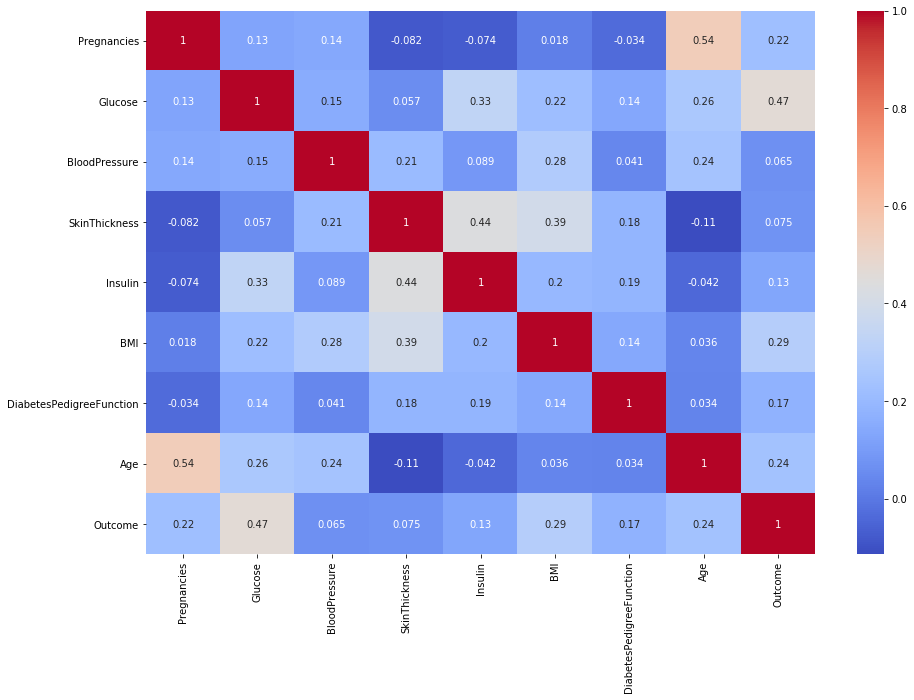

In [133]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [134]:
from sklearn.model_selection import cross_val_score

In [99]:
score=cross_val_score(knn,X,y,scoring='accuracy', cv=10)

In [100]:
error_rate=[]
for i in range(1,51):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y,scoring='accuracy', cv=10)
    error_rate.append(score.mean())

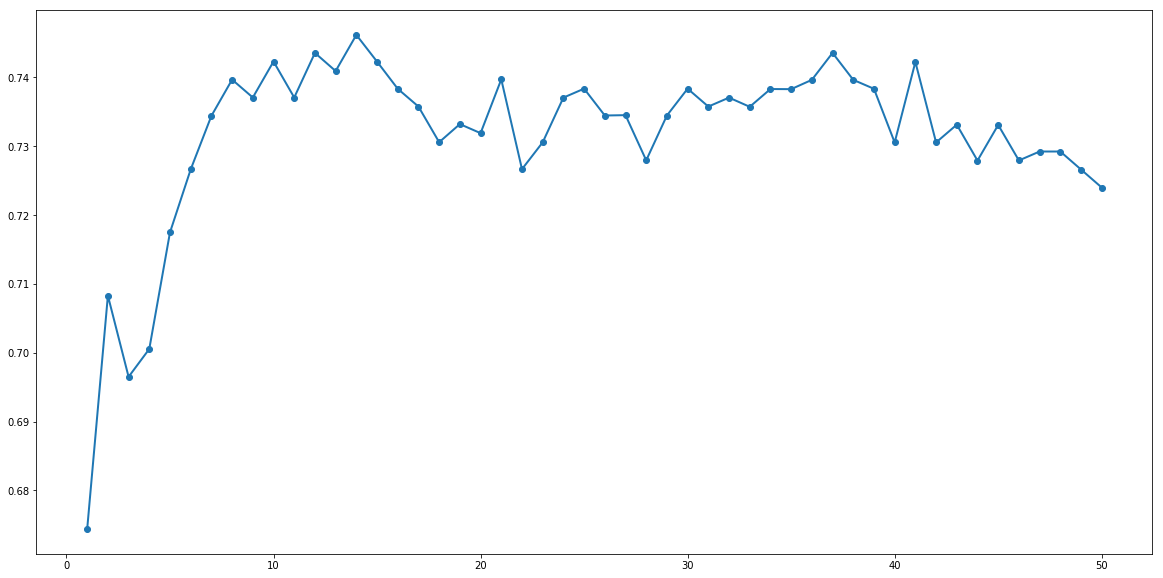

In [101]:
plt.figure(figsize=(20,10))
plt.plot(range(1,51),error_rate,linewidth=2,marker='o')

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
k_range=list(range(1,51))

In [104]:
param_grid=dict(n_neighbors=k_range)

In [105]:
grid=GridSearchCV(knn,param_grid,cv=10,scoring='accuracy')

In [106]:
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [107]:
print(grid.best_score_)
print(grid.best_params_)

0.74609375
{'n_neighbors': 14}


In [110]:
knn=KNeighborsClassifier(n_neighbors=14)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=14, p=2,
           weights='uniform')

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [112]:
logreg=LogisticRegression()

In [113]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [114]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [115]:
pred=logreg.predict(X_test)

In [116]:
from sklearn.metrics import classification_report,confusion_matrix

In [117]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       130
          1       0.73      0.52      0.60        62

avg / total       0.77      0.78      0.77       192

[[118  12]
 [ 30  32]]


In [118]:
knn=KNeighborsClassifier(n_neighbors=14)

In [119]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=14, p=2,
           weights='uniform')

In [120]:
pred=knn.predict(X_test)

In [122]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

          0       0.79      0.88      0.84       130
          1       0.68      0.52      0.59        62

avg / total       0.76      0.77      0.76       192

[[115  15]
 [ 30  32]]


In [123]:
from sklearn.tree import DecisionTreeClassifier

In [124]:
tree=DecisionTreeClassifier()

In [125]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [126]:
pred=tree.predict(X_test)

In [127]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

          0       0.80      0.79      0.80       130
          1       0.57      0.58      0.58        62

avg / total       0.73      0.72      0.72       192

[[103  27]
 [ 26  36]]


In [128]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
rfc=RandomForestClassifier(n_estimators=200)

In [130]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [131]:
pred=rfc.predict(X_test)

In [132]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

          0       0.82      0.85      0.83       130
          1       0.66      0.60      0.63        62

avg / total       0.77      0.77      0.77       192

[[111  19]
 [ 25  37]]
